<a href="https://colab.research.google.com/github/imYours14/PCVK_Genap_2023/blob/main/Week11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import library yang dibutuhkan:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [2]:
#akses drive
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


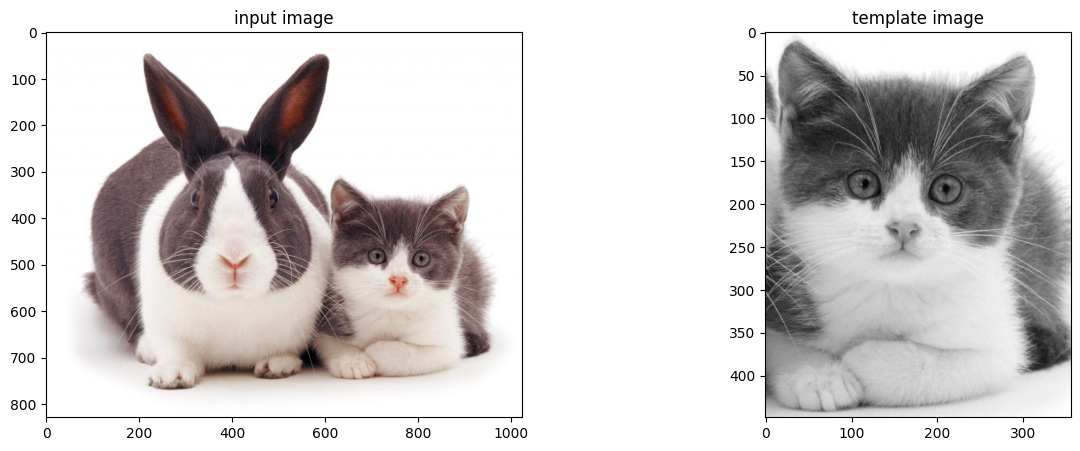

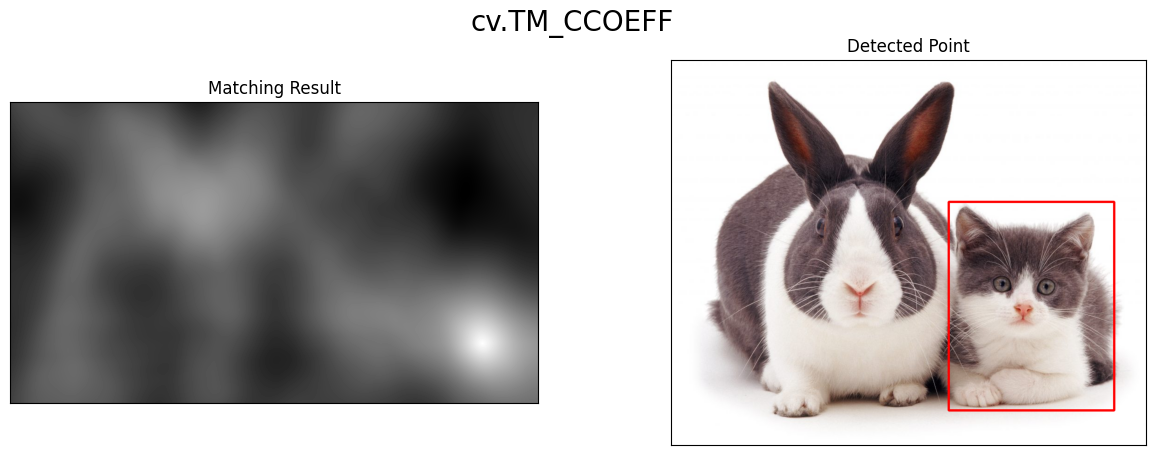

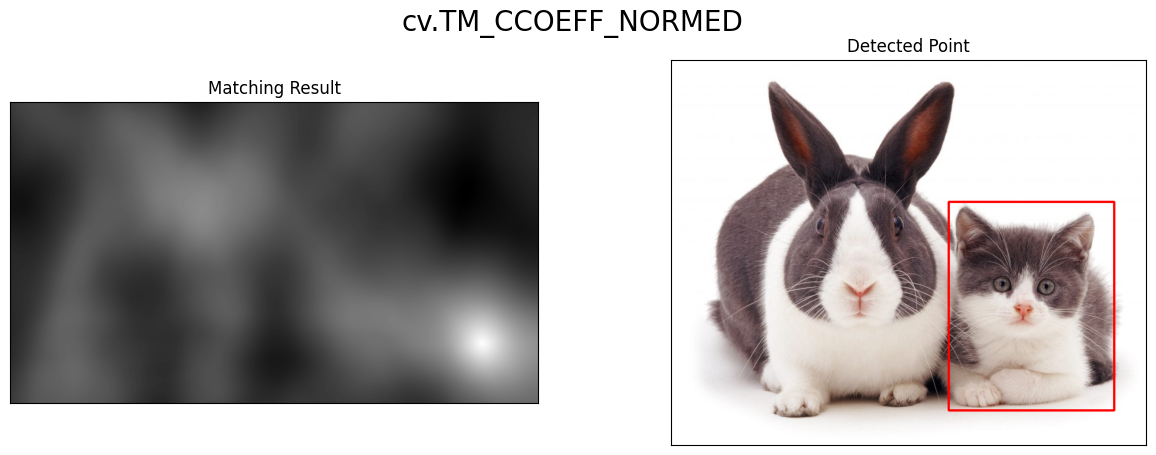

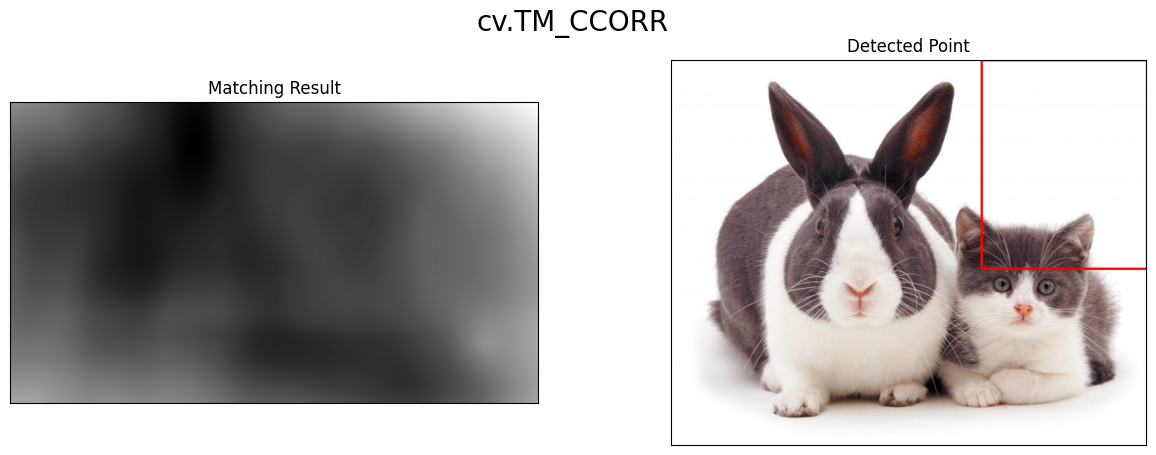

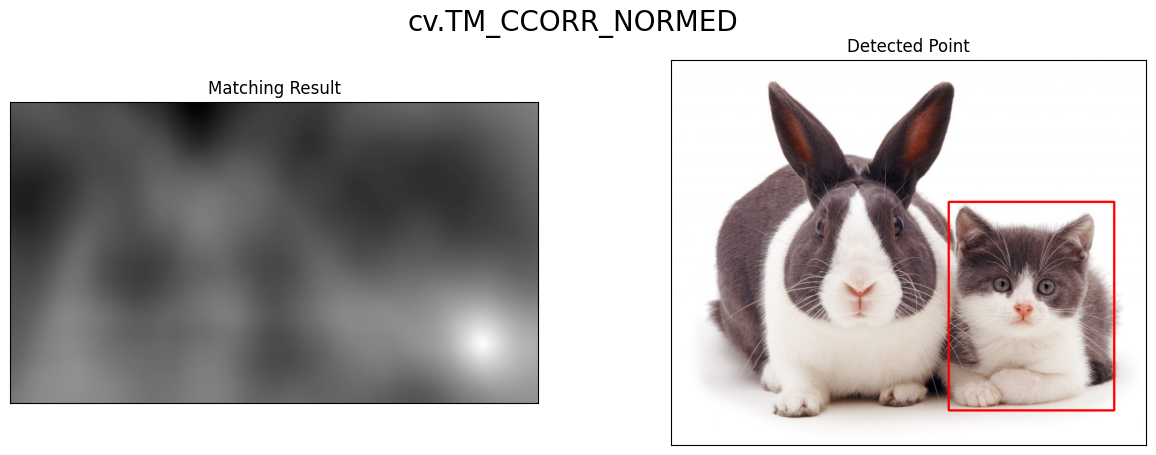

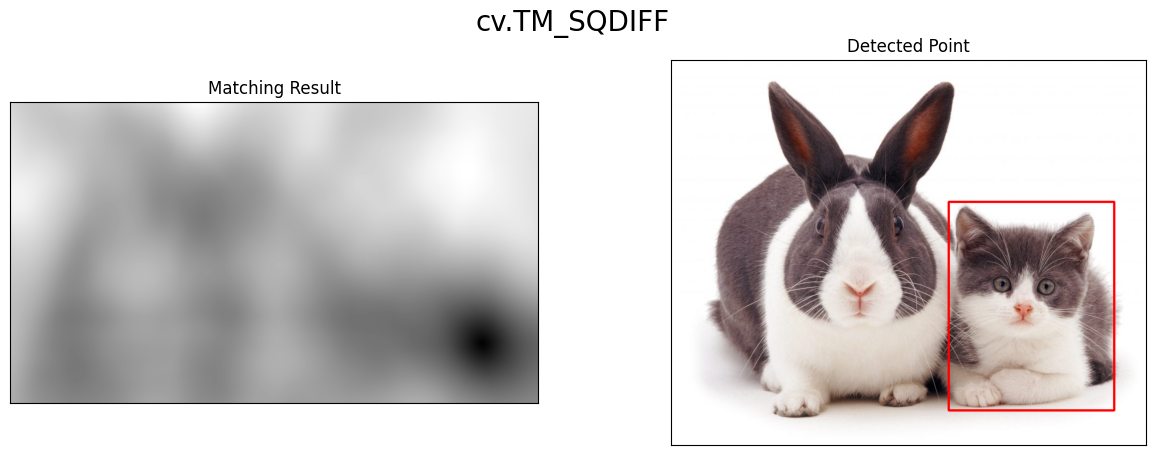

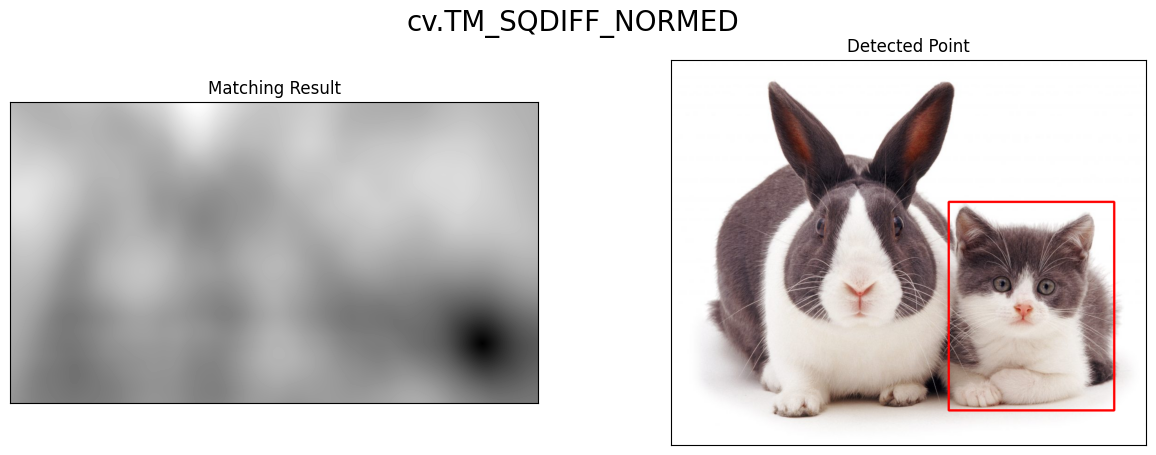

In [4]:
img = cv.imread('/content/drive/MyDrive/PCVK/Week11/cats_and_bunnies.jpg') 
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img2 = img.copy()
template = cv.imread('/content/drive/MyDrive/PCVK/Week11/cat2_templatejpg.jpg', 0)
w, h = template.shape[::-1]

# Membuat 2 plot untuk citra input dan template 
f, axarr = plt. subplots(1,2,figsize=(15,5))
axarr[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)), axarr[0].set_title("input image") 
axarr[1].imshow(cv.cvtColor(template, cv.COLOR_BGR2RGB)), axarr[1].set_title("template image")

# 6 metode template matching
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

for meth in methods:
    img = img2.copy()
    method = eval(meth)
    # Template Matching
    res = cv.matchTemplate(img_gray,template,method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv.rectangle(img, top_left, bottom_right,(0,0,255),3)
    plt.figure(figsize=(15,5))
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    print("\n\n")
    plt.suptitle(meth, fontsize=20)
    plt.show()

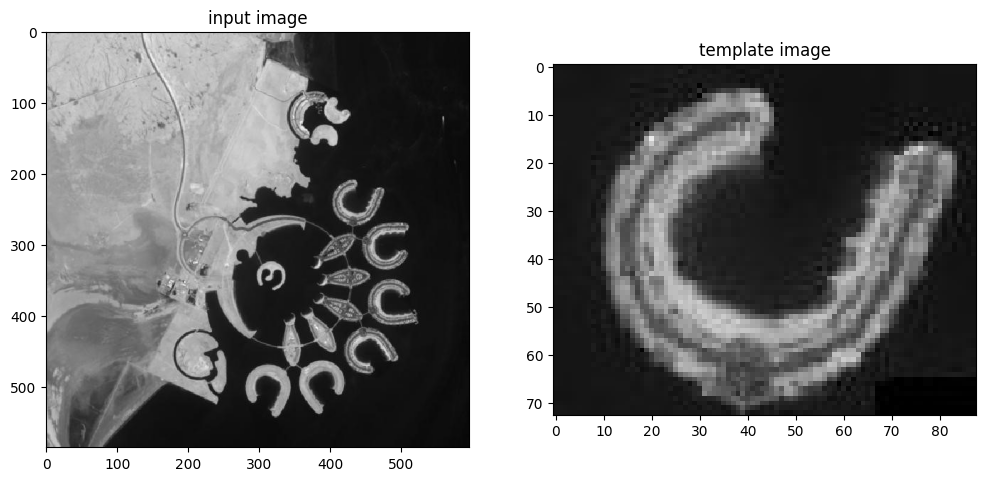

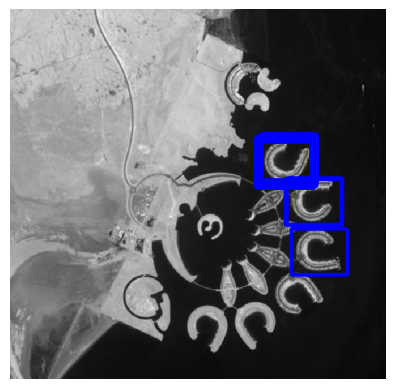

In [10]:
from skimage.feature import match_template

img = cv.imread('/content/drive/MyDrive/PCVK/Week11/bahrain.jpg', 0) 
template = cv.imread('/content/drive/MyDrive/PCVK/Week11/bahrain-template.jpg', 0)

f, axarr = plt. subplots(1,2,figsize=(12,8))
axarr[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)), axarr[0].set_title("input image") 
axarr[1].imshow(cv.cvtColor(template, cv.COLOR_BGR2RGB)), axarr[1].set_title("template image")

# Hitung kemiripan citra dengan citra template
result = match_template(img, template)

# Tentukan threshold untuk menentukan hasil match
threshold = 0.5
locations = np.where(result >= threshold)

# Plot hasil match
fig, ax = plt.subplots()
ax.imshow(img, cmap=plt.cm.gray)
ax.set_axis_off()
height, width = template.shape
for loc in zip(*locations[::-1]):
    rect = plt.Rectangle(loc, width, height, edgecolor='blue', facecolor='none', linewidth=1)
    ax.add_patch(rect)
plt.show()

In [16]:
img= cv.imread('/content/drive/MyDrive/PCVK/Week11/car-park.jpg')

img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

img_car = cv.cvtColor(img, cv.COLOR_BGR2RGB)

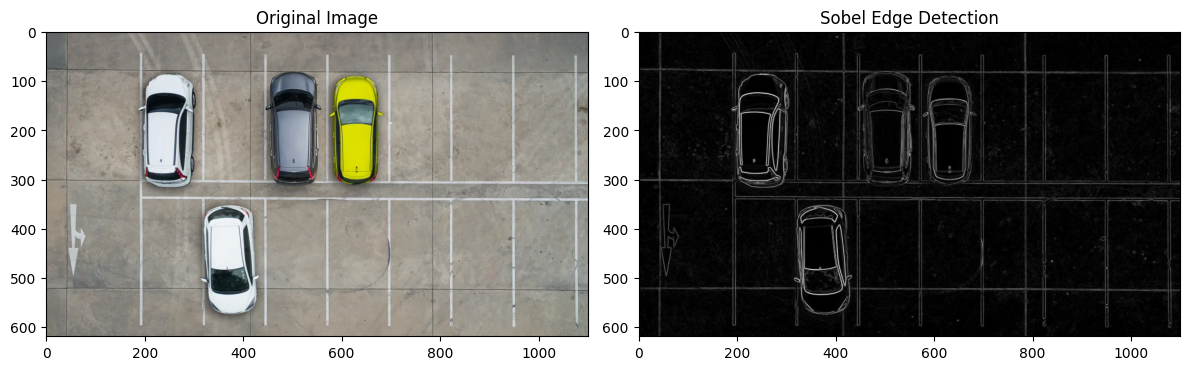

In [17]:
# Sobel Edge Detection
sobel_x = cv.Sobel(img_gray, cv.CV_64F, 1, 0, ksize=3)
sobel_y = cv.Sobel(img_gray, cv.CV_64F, 0, 1, ksize=3)
sobel_combined = cv.magnitude(sobel_x, sobel_y)

# Tampilkan gambar asli dan hasil deteksi tepi
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.imshow(img_car, cmap='gray')
plt.title('Original Image')

plt.subplot(2, 2, 2)
plt.imshow(sobel_combined, cmap='gray')
plt.title('Sobel Edge Detection')

plt.tight_layout()
plt.show()

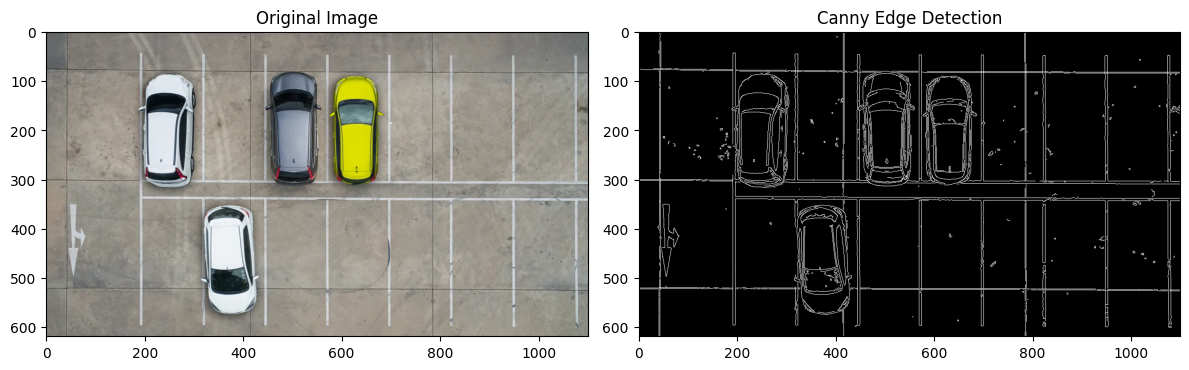

In [18]:
# Canny Edge Detection
canny = cv.Canny(img_car, 100, 200)

# Tampilkan gambar asli dan hasil deteksi tepi
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.imshow(img_car, cmap='gray')
plt.title('Original Image')

plt.subplot(2, 2, 2)
plt.imshow(canny, cmap='gray')
plt.title('Canny Edge Detection')

plt.tight_layout()
plt.show()

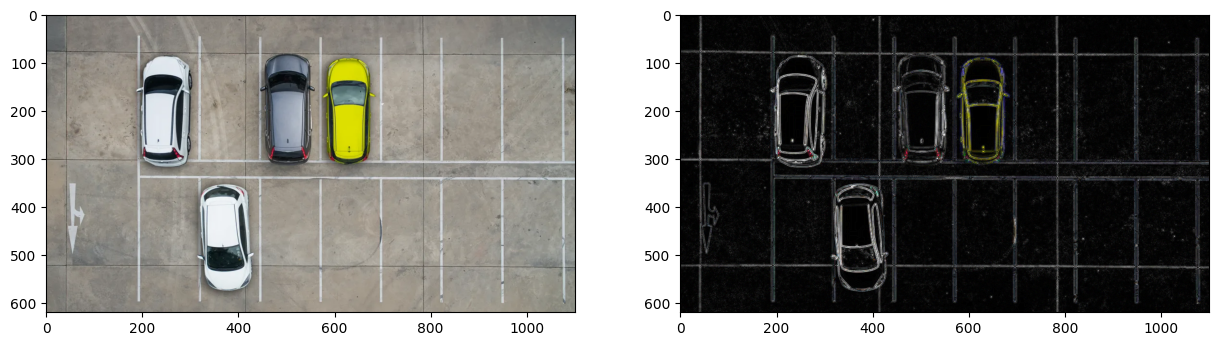

In [19]:
car_park = cv.imread('/content/drive/MyDrive/PCVK/Week11/car-park.jpg')

# Reduce noise in image
img_car_noise = cv.GaussianBlur(car_park,(3,3),0)

# Filter the image using filter2D, which has inputs: (grayscale image, bit-depth, kernel)
filtered_image = cv.Laplacian(img_car_noise, ksize=3, ddepth=cv.CV_16S)

# converting back to uint8
filtered_image = cv.convertScaleAbs(filtered_image)

# Tampilkan gambar asli dan hasil deteksi tepi
f, axarr = plt. subplots(1,2,figsize=(15,5))
axarr[0].imshow(img_car)
axarr[1].imshow(cv.cvtColor(filtered_image, cv.COLOR_BGR2RGB))

In [20]:
img_cb = cv.imread('/content/drive/MyDrive/PCVK/Week11/chess-board.jpg')
gray = cv.cvtColor(img_cb, cv.COLOR_BGR2GRAY)

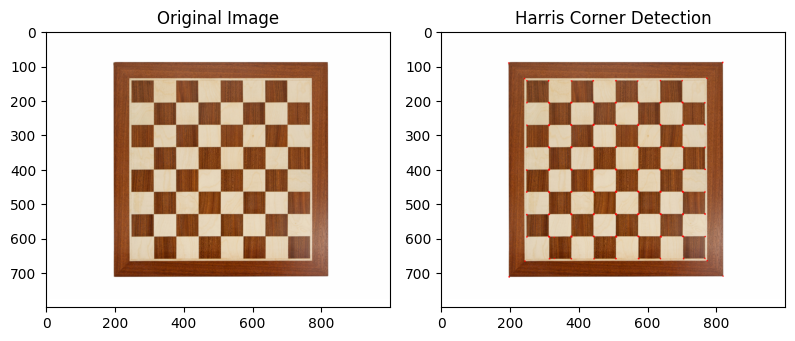

In [21]:
# Harris Corner Detection
hc = cv.cornerHarris(gray, 2, 3, 0.04)
hc = cv.dilate(hc, None)

# Threshold untuk menandai sudut
threshold = 0.01 * hc.max()
harris_image = np.copy(img_cb)
harris_image[hc > threshold] = [0, 0, 255]  # Merah untuk sudut

# Tampilkan gambar asli dan hasil deteksi sudut
plt.figure(figsize=(12, 8))
plt.subplot(1, 3, 1)
plt.imshow(cv.cvtColor(img_cb, cv.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(cv.cvtColor(harris_image, cv.COLOR_BGR2RGB))
plt.title('Harris Corner Detection')

plt.tight_layout()
plt.show()

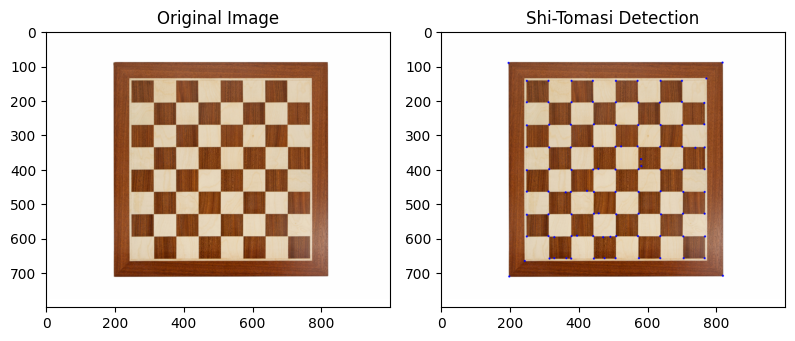

In [22]:
# Shi-Tomasi Detection
st = cv.goodFeaturesToTrack(gray, 100, 0.01, 10)
st = np.int0(st)

st_image = np.copy(img_cb)
for corner in st:
    x, y = corner.ravel()
    cv.circle(st_image, (x, y), 3, (255, 0, 0),-6)  # Biru untuk sudut

# Tampilkan gambar asli dan hasil deteksi sudut
plt.figure(figsize=(12, 8))
plt.subplot(1, 3, 1)
plt.imshow(cv.cvtColor(img_cb, cv.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(cv.cvtColor(st_image, cv.COLOR_BGR2RGB))
plt.title('Shi-Tomasi Detection')

plt.tight_layout()
plt.show()

number of Hough lines: 33
Number of filtered lines: 1
Number of filtered lines: 2
Number of filtered lines: 3
Number of filtered lines: 4
Number of filtered lines: 5
Number of filtered lines: 6
Number of filtered lines: 7
Number of filtered lines: 8
Number of filtered lines: 9
Number of filtered lines: 10
Number of filtered lines: 11
Number of filtered lines: 12
Number of filtered lines: 13
Number of filtered lines: 14
Number of filtered lines: 14
Number of filtered lines: 15
Number of filtered lines: 15
Number of filtered lines: 15
Number of filtered lines: 16
Number of filtered lines: 16
Number of filtered lines: 17
Number of filtered lines: 17
Number of filtered lines: 18
Number of filtered lines: 18
Number of filtered lines: 19
Number of filtered lines: 19
Number of filtered lines: 19
Number of filtered lines: 20
Number of filtered lines: 20
Number of filtered lines: 20
Number of filtered lines: 20
Number of filtered lines: 20
Number of filtered lines: 20


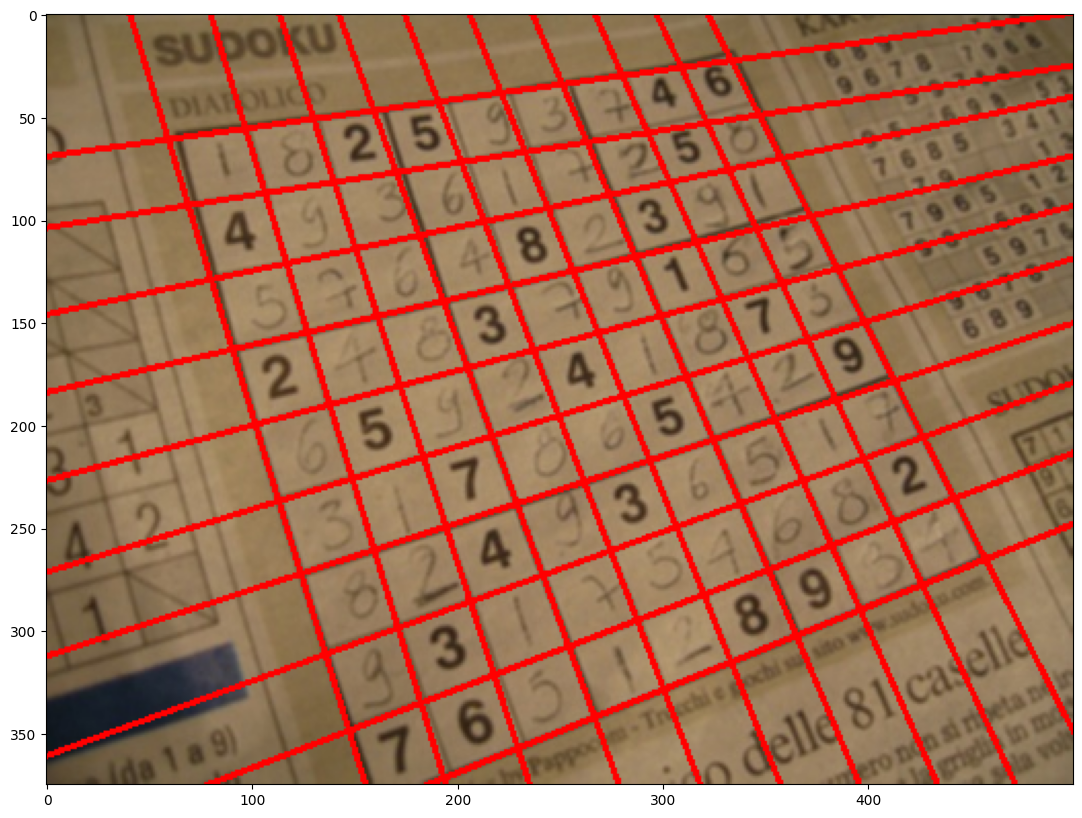

In [23]:
img_s = cv.imread('/content/drive/MyDrive/PCVK/Week11/sudoku.jpg') 
img_gs = cv.cvtColor(img_s, cv.COLOR_BGR2GRAY)

edges = cv.Canny (img_gs, 90, 150, apertureSize = 3)

kernel = np.ones((3,3), np.uint8) 
edges = cv.dilate(edges, kernel, iterations = 1)

kernel = np.ones((5,5), np.uint8) 
edges = cv.erode (edges, kernel, iterations = 1)

lines = cv.HoughLines(edges, 1, np.pi / 180, 150)


if not lines.any():
    print('No lines were found') 
    exit()

if filter:
    rho_threshold = 15 
    theta_threshold = 0.1

 
    similar_lines = {i : [] for i in range(len(lines))} 
    for i in range(len(lines)): 
      for j in range (len (lines)): 
        if i == j: 
            continue

        rho_i, theta_i = lines[i][0] 
        rho_j, theta_j = lines[j][0] 
        if abs(rho_i - rho_j) < rho_threshold and abs (theta_i - theta_j) < theta_threshold:
            similar_lines[i].append(j)


    indices = [i for i in range(len(lines))] 
    indices.sort(key=lambda x: len(similar_lines[x]))

    line_flags = len(lines) *[True] 
    for i in range(len(lines) - 1): 
        if not line_flags [indices[i]]: 
            continue

        for j in range(i + 1, len(lines)): 
            if not line_flags[indices[j]]:
                continue
            rho_i, theta_i = lines[indices[i]][0] 
            rho_j, theta_j = lines[indices[j]][0] 
            if abs(rho_i - rho_j) < rho_threshold and abs(theta_i - theta_j) < theta_threshold:
                line_flags [indices[j]] = False
    print('number of Hough lines:', len(lines))
    
    filtered_lines = []

    if filter:
        for i in range(len(lines)): 
            if line_flags[i]:
                filtered_lines.append(lines[i])

            print('Number of filtered lines:', len(filtered_lines )) 
    else:
        filtered_lines = lines

    for line in filtered_lines:
        rho, theta = line [0] 
        a = np.cos(theta) 
        b = np.sin(theta) 
        x0 = a*rho 
        y0 = b*rho 
        x1 = int(x0 + 1000*(-b)) 
        y1 = int(y0 + 1000*(a)) 
        x2 = int(x0 - 1000*(-b)) 
        y2 = int(y0 - 1000*(a))

        cv.line(img_s, (x1, y1), (x2,y2),(0,0,255),2)

    plt.figure(figsize=(20,10)) 
    plt.imshow(cv.cvtColor(img_s, cv.COLOR_BGR2RGB))

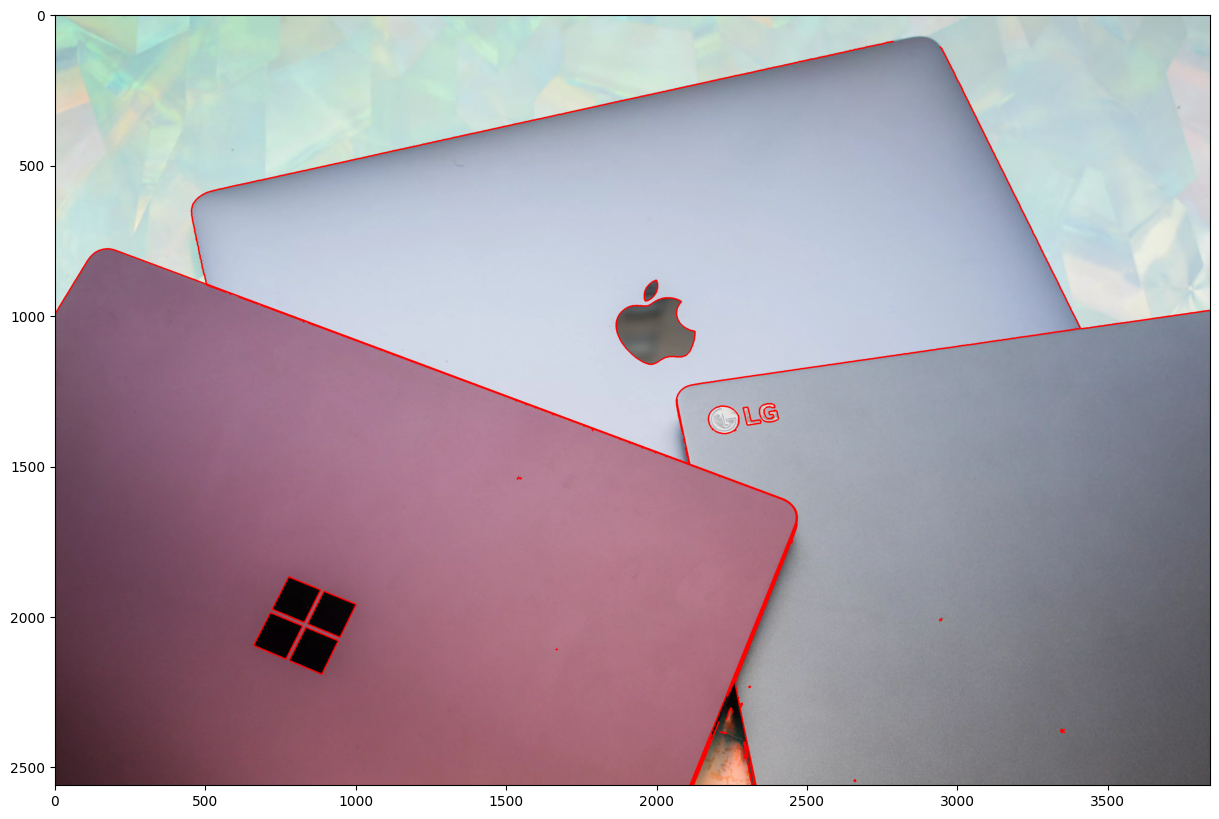

In [24]:
img = cv.imread('/content/drive/MyDrive/PCVK/Week11/laptop.jpg') 
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

edged = cv.Canny(img_gray, 30, 200)

contours, hierarchy = cv.findContours(edged, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

cv.drawContours(img, contours, -1, (0,0,255), 3)

plt.figure(figsize=(20,10)) 
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))